Tarea 3 Inteligencia computacional

Bastián Garcés

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import sklearn.preprocessing
import sklearn.svm 
import sklearn.model_selection
import sklearn.metrics
from scipy.io import arff
import sklearn.feature_selection
import sklearn.ensemble

In [49]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.arff to diabetes.arff


Parte 1


---


> Actividad B



In [50]:
data = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
nombres = df.columns

In [51]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


In [52]:
#En el dataframe df cambiamos la clase como:
#Un 1 si la persona dio positivo o un 0 sino
df.loc[df['class'] == b'tested_negative', 'class'] = 0
df.loc[df['class'] == b'tested_positive', 'class'] = 1

#Definimos los conjuntos
Entrena, Otro = sklearn.model_selection.train_test_split(df, test_size=0.4)
Vali, Test = sklearn.model_selection.train_test_split(Otro, test_size=0.5)

Entrena.reset_index(drop=True)
Vali.reset_index(drop=True)
Test.reset_index(drop=True)
print('')


> Actividad C


In [53]:
#Creamos el StandardScaler
scaler = sklearn.preprocessing.StandardScaler()

#Entrenamos el scaler en el conjunto de entrenamient
scaler.fit(Entrena.iloc[:,:8])

#Aplicamos el scaler a los conjuntos
S_Entrena = scaler.transform(Entrena.iloc[:,:8])
S_Vali = scaler.transform(Vali.iloc[:,:8])
S_Test = scaler.transform(Test.iloc[:,:8])

#Obtenemos la columna class de cada conjunto
Entrena_class = np.array(Entrena['class'], dtype='int64')
Vali_class = np.array(Vali['class'], dtype='int64')
Test_class = np.array(Test['class'], dtype='int64')




> Actividad D





In [54]:
#Antes de crear el GridSearch concatenamos conjunto de entrenamiento y de validacion
Entrena_Vali = np.concatenate([S_Entrena, S_Vali])
Entrena_Vali_class = np.concatenate([Entrena_class, Vali_class])

#Vemos que indices del conjunto Entrena_Vali pertenecen al conjunto de entrenamiento
index = np.zeros(Entrena.shape[0]+Vali.shape[0])
for i in range(Entrena.shape[0]):
  index[i] = -1

#Definimos el predifinedSplit
ps = sklearn.model_selection.PredefinedSplit(index)

#Creamos el SVM lineal
SVM_lin = sklearn.svm.SVC(kernel='linear', probability=False)
#Creamos el gridSearch
grid_lin = sklearn.model_selection.GridSearchCV(estimator=SVM_lin, param_grid={'C' : [0.0001, 0.001, 0.1]}, cv=ps)

time0 = time.time() #<-- Inicio del entrenamiento
#Entrenamos el grid con el conjunto de entrenamiento y validacion concatenados
grid_lin.fit(Entrena_Vali, Entrena_Vali_class)
time1 = time.time() #<- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_lin.best_params_))
#Vemos el score
print('El score es: '+str(grid_lin.best_score_))
#Vemos el tiempo de entrenamiento
tiempo = time1-time0
print('El tiempo de entrenamiento es: '+str(tiempo))

#El mejor estimador es:
estim_lin = grid_lin.best_estimator_

Los mejores hiperparametros son: {'C': 0.1}
El score es: 0.7272727272727273
El tiempo de entrenamiento es: 0.02456045150756836




> Actividad E


El accuracy es: 0.7272727272727273


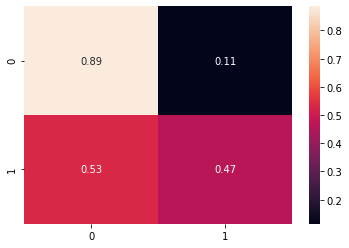

In [55]:
#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_lin = estim_lin.predict(S_Vali)

#Obtenemos la matriz de confusión
Confu = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_lin, normalize='true')

#Mostramos la matriz de confusion
matrix = sns.heatmap(Confu, annot=True)

#Obtenemos el accuracy del SVM lineal
accuracy_lin = sklearn.metrics.accuracy_score(Vali_class, predi_vali_lin)
                                     
print('El accuracy es: '+str(accuracy_lin))



> Actividad F


In [56]:
#Hacemos el Model
model_lin = sklearn.feature_selection.SelectFromModel(estim_lin)
#Entrenamos el modelo con el conjunto de entrenamiento
model_lin.fit(S_Entrena, Entrena_class)

#Obtenemos las caracteristicas seleccionadas
caracte_lin = model_lin.get_support(indices=False) #<- Array que indica las caracteristicas consideradas

#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_lin = []
for i in range(len(caracte_lin)):
  if caracte_lin[i] == True:
    select_carac_lin.append(nombres[i])
print('Las caracteristicas seleccionadas son: '+str(select_carac_lin))

Las caracteristicas seleccionadas son: ['plas', 'mass']




> Actividad G



In [57]:
#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu = model_lin.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu = model_lin.transform(S_Vali) #<----- Conjunto de validacion
Test_redu = model_lin.transform(S_Test) #<----- Conjunto de prueba

#Reentrenamos con el conjunto reducido
SVM_lin2 = sklearn.svm.SVC(kernel='linear', probability=False)
grid_lin2 = sklearn.model_selection.GridSearchCV(SVM_lin2, param_grid={'C' : [0.0001, 0.001, 0.1]}, cv=ps) 

time2 = time.time() #<------- Inicio del entrenamiento
grid_lin2.fit(Entrena_Vali_redu, Entrena_Vali_class)
time3 = time.time() #<-------- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_lin2.best_params_))
#Vemos el score
print('El score es: '+str(grid_lin2.best_score_))
#Vemos el tiempo de entrenamiento
tiempo1 = time3-time2
print('El tiempo de entrenamiento es de: '+str(tiempo1))

#Obtenemos el mejor estimador
estim_lin2 = grid_lin2.best_estimator_

Los mejores hiperparametros son: {'C': 0.1}
El score es: 0.7142857142857143
El tiempo de entrenamiento es de: 0.015648841857910156




> Actividad H



El accuracy al usar un conjunto con las caracteristicas reducidas es: 0.7012987012987013


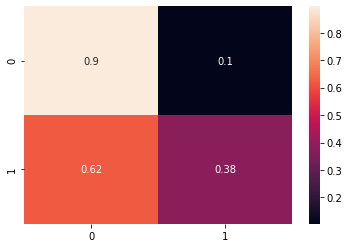

In [58]:
#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_lin2 = estim_lin2.predict(Vali_redu)

#Obtenemos la matriz de confusión
Confu2 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_lin2, normalize='true')

#Mostramos la matriz de confusion
matrix2 = sns.heatmap(Confu2, annot=True)

#Obtenemos el accuracy del SVM lineal
accuracy_lin2 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_lin2)
                                              
print('El accuracy al usar un conjunto con las caracteristicas reducidas es: '+str(accuracy_lin2))



> Actividad I



Las caracteristicas seleccionadas son: ['preg', 'plas', 'mass', 'age']
Los mejores hiperparametros son: {'C': 0.1}
El score es: 0.7077922077922078
El tiempo de entrenamiento es de: 0.020557880401611328
El accuracy al usar un conjunto de caracteristicas reducidas (4 caracteristicas) es: 0.7337662337662337


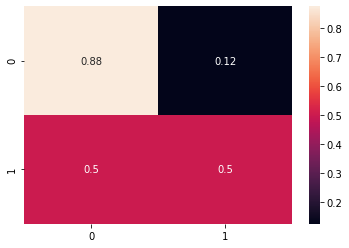

In [59]:
#Obtenemos el conjunto de caracteristicas (4)
SelectKBest4 = sklearn.feature_selection.SelectKBest(k=4).fit(S_Entrena, Entrena_class)
caract_KBest4 = SelectKBest4.get_support(indices=False) #<--- Array que indica las caracteristicas consideradas
#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_KBest4 = []
for i in range(len(caract_KBest4)):
  if caract_KBest4[i] == True:
    select_carac_KBest4.append(nombres[i])
print('Las caracteristicas seleccionadas son: '+str(select_carac_KBest4))

#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu_KBest4 = SelectKBest4.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu_KBest4 = SelectKBest4.transform(S_Vali) #<----- Conjunto de validacion
Test_redu_KBest4 = SelectKBest4.transform(S_Test) #<----- Conjunto de prueba

#Reentrenamos con el conjunto reducido
SVM_KBest4 = sklearn.svm.SVC(kernel='linear', probability=False)
grid_KBest4 = sklearn.model_selection.GridSearchCV(SVM_KBest4, param_grid={'C' : [0.0001, 0.001, 0.1]}, cv=ps) 

time4 = time.time() #<------- Inicio del entrenamiento
grid_KBest4.fit(Entrena_Vali_redu_KBest4, Entrena_Vali_class)
time5 = time.time() #<-------- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_KBest4.best_params_))
#Vemos el score
print('El score es: '+str(grid_KBest4.best_score_))
#Vemos el tiempo de entrenamiento
tiempo2 = time5-time4
print('El tiempo de entrenamiento es de: '+str(tiempo2))

#Obtenemos el mejor estimador
estim_KBest4 = grid_KBest4.best_estimator_

#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_KBest4 = estim_KBest4.predict(Vali_redu_KBest4)

#Obtenemos la matriz de confusión
Confu3 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_KBest4, normalize='true')

#Mostramos la matriz de confusion
matrix3 = sns.heatmap(Confu3, annot=True)

#Obtenemos el accuracy del SVM lineal
accuracy_KBest4 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_KBest4)
                                              
print('El accuracy al usar un conjunto de caracteristicas reducidas (4 caracteristicas) es: '+str(accuracy_KBest4))



> Actividad J



Las caracteristicas seleccionadas son: ['plas', 'mass']
Los mejores hiperparametros son: {'C': 0.1}
El score es: 0.7142857142857143
El tiempo de entrenamiento es de: 0.015395879745483398
El accuracy al usar un conjunto de caracteristicas reducidas (2 caracteristicas) es: 0.7012987012987013


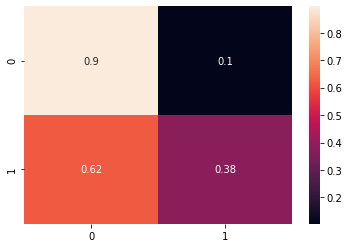

In [60]:
#Obtenemos el conjunto de caracteristicas (2)
SelectKBest2 = sklearn.feature_selection.SelectKBest(k=2).fit(S_Entrena, Entrena_class)
caract_KBest2 = SelectKBest2.get_support(indices=False) #<--- Array que indica las caracteristicas consideradas
#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_KBest2 = []
for i in range(len(caract_KBest2)):
  if caract_KBest2[i] == True:
    select_carac_KBest2.append(nombres[i])
print('Las caracteristicas seleccionadas son: '+str(select_carac_KBest2))

#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu_KBest2 = SelectKBest2.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu_KBest2 = SelectKBest2.transform(S_Vali) #<----- Conjunto de validacion
Test_redu_KBest2 = SelectKBest2.transform(S_Test) #<----- Conjunto de prueba

#Reentrenamos con el conjunto reducido
SVM_KBest2 = sklearn.svm.SVC(kernel='linear', probability=False)
grid_KBest2 = sklearn.model_selection.GridSearchCV(SVM_KBest2, param_grid={'C' : [0.0001, 0.001, 0.1]}, cv=ps) 

time6 = time.time() #<------- Inicio del entrenamiento
grid_KBest2.fit(Entrena_Vali_redu_KBest2, Entrena_Vali_class)
time7 = time.time() #<-------- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_KBest2.best_params_))
#Vemos el score
print('El score es: '+str(grid_KBest2.best_score_))
#Vemos el tiempo de entrenamiento
tiempo3 = time7-time6
print('El tiempo de entrenamiento es de: '+str(tiempo3))

#Obtenemos el mejor estimador
estim_KBest2 = grid_KBest2.best_estimator_

#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_KBest2 = estim_KBest2.predict(Vali_redu_KBest2)

#Obtenemos la matriz de confusión
Confu4 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_KBest2, normalize='true')

#Mostramos la matriz de confusion
matrix4 = sns.heatmap(Confu4, annot=True)

#Obtenemos el accuracy del SVM lineal
accuracy_KBest2 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_KBest2)
                                              
print('El accuracy al usar un conjunto de caracteristicas reducidas (2 caracteristicas) es: '+str(accuracy_KBest2))



> Actividad K



Los mejores hiperparametros son: {'n_estimators': 50}
El score es: 0.7142857142857143
El tiempo de entrenamiento es: 1.1715118885040283
El accuracy es: 0.7597402597402597


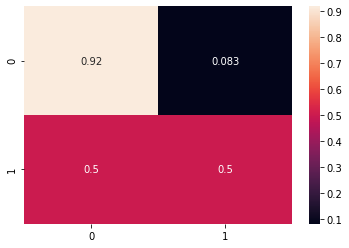

In [61]:
#Definimos el clasificador Random Forest
Forest1 = sklearn.ensemble.RandomForestClassifier(max_depth=3)
#Definimos el grid y lo entrenamos
grid_Forest1 = sklearn.model_selection.GridSearchCV(Forest1, {'n_estimators' : [50, 100, 150, 200, 250]}, cv=ps)

time8 = time.time() #<-- Inicio del entrenamiento
grid_Forest1.fit(Entrena_Vali, Entrena_Vali_class) 
time9 = time.time() #Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_Forest1.best_params_))
#Vemos el score
print('El score es: '+str(grid_Forest1.best_score_))
#Vemos el tiempo de entrenamiento
tiempo4 = time9-time8
print('El tiempo de entrenamiento es: '+str(tiempo4))

#Obtenemos el mejor estimador
estim_Forest1 = grid_Forest1.best_estimator_

#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_Forest1 = estim_Forest1.predict(S_Vali)

#Obtenemos la matriz de confusion
Confu5 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_Forest1, normalize='true')

#Mostramos la matriz de confusion
matrix5 = sns.heatmap(Confu5, annot=True)

#Obtenemos el accuracy
accuracy_Forest1 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_Forest1)
print('El accuracy es: '+str(accuracy_Forest1))



> Actividad L



Las caracteristicas seleccionadas son: ['plas', 'mass', 'age']
Los mejores hiperparametros son: {'n_estimators': 50}
El score es: 0.7272727272727273
El tiempo de entrenamiento es de: 1.1783244609832764
El accuracy es de: 0.7467532467532467


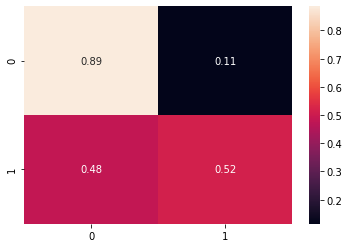

In [62]:
#Hacemos el model
model_Forest1 = sklearn.feature_selection.SelectFromModel(estim_Forest1)

#Entrenamos el model con el conjunto de entrenamiento
model_Forest1.fit(S_Entrena, Entrena_class)

#Obtenemos las caracteristicas seleccionadas
caracte_Forest1 = model_Forest1.get_support(indices=False)

#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_Forest1 = []
for i in range(len(caracte_Forest1)):
  if caracte_Forest1[i] == True:
    select_carac_Forest1.append(nombres[i])
print('Las caracteristicas seleccionadas son: '+str(select_carac_Forest1))

#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu_Forest1 = model_Forest1.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu_Forest1 = model_Forest1.transform(S_Vali) #<----- Conjunto de validacion
Test_redu_Forest1 = model_Forest1.transform(S_Test) #<----- Conjunto de prueba

#Reentrenamos con el conjunto reducido
Forest2 = sklearn.ensemble.RandomForestClassifier(max_depth=3)
grid_Forest2 = sklearn.model_selection.GridSearchCV(Forest2, param_grid={'n_estimators' : [50, 100, 150, 200, 250]}, cv=ps)

time10 = time.time() #<------- Inicio del entrenamiento
grid_Forest2.fit(Entrena_Vali_redu_Forest1, Entrena_Vali_class)
time11 = time.time() #<-------- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_Forest2.best_params_))
#Vemos el score
print('El score es: '+str(grid_Forest2.best_score_))
#Obtenemos el tiempo de entrenamiento
tiempo5 = time11-time10
print('El tiempo de entrenamiento es de: '+str(tiempo5))

#Obtenemos el mejor estimador
estim_Forest2 = grid_Forest2.best_estimator_

#Obtenemos la predicion del randomForest sobre el conjunto de validacion
predi_vali_Forest2 = estim_Forest2.predict(Vali_redu_Forest1)

#Obtenemos la matriz de confusion
Confu6 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_Forest2, normalize='true')

#Mostramos la matriz de confusion
matrix6 = sns.heatmap(Confu6, annot=True)

#Obtenemos el accuracy 
accuracy_Forest2 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_Forest2)
print('El accuracy es de: '+str(accuracy_Forest2))



> Actividad M



Las caracteristicas seleccionadas son: ['preg', 'plas', 'mass', 'age']
Los mejores hiperparametros son: {'n_estimators': 50}
El score es: 0.7207792207792207
El tiempo de entrenamiento es de: 1.180464506149292
El accuracy al usar un conjunto de caracteristicas reducidas (4 caracteristicas) es: 0.7662337662337663


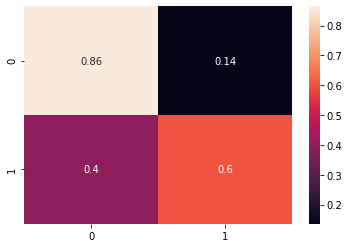

In [63]:
#Obtenemos el conjunto de caracteristicas (4)
Forest_SelectKBest4 = sklearn.feature_selection.SelectKBest(k=4).fit(S_Entrena, Entrena_class)
caract_Forest_KBest4 = Forest_SelectKBest4.get_support(indices=False) #<- Array que indica las caracteristicas consideradas
#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_Forest_KBest4 = []
for i in range(len(caract_Forest_KBest4)):
  if caract_Forest_KBest4[i] == True:
    select_carac_Forest_KBest4.append(nombres[i])
print('Las caracteristicas seleccionadas son: '+str(select_carac_Forest_KBest4))

#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu_Forest_KBest4 = Forest_SelectKBest4.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu_Forest_KBest4 = Forest_SelectKBest4.transform(S_Vali) #<----- Conjunto de validacion
Test_redu_Forest_KBest4 = Forest_SelectKBest4.transform(S_Test) #<----- Conjunto de prueba

#Reentrenamos con el conjunto reducido
Forest_KBest4 = sklearn.ensemble.RandomForestClassifier(max_depth=3)
grid_Forest_KBest4 = sklearn.model_selection.GridSearchCV(Forest_KBest4, param_grid={'n_estimators' : [50, 100, 150, 200, 250]}, cv=ps) 

time12 = time.time() #<------- Inicio del entrenamiento
grid_Forest_KBest4.fit(Entrena_Vali_redu_Forest_KBest4, Entrena_Vali_class)
time13 = time.time() #<-------- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_Forest_KBest4.best_params_))
#Vemos el score
print('El score es: '+str(grid_Forest_KBest4.best_score_))
#Obtenemos el tiempo de entrenamiento
tiempo6 = time13-time12
print('El tiempo de entrenamiento es de: '+str(tiempo6))

#Obtenemos el mejor estimador
estim_Forest_KBest4 = grid_Forest_KBest4.best_estimator_

#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_Forest_KBest4 = estim_Forest_KBest4.predict(Vali_redu_Forest_KBest4)

#Obtenemos la matriz de confusión
Confu7 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_Forest_KBest4, normalize='true')

#Mostramos la matriz de confusion
matrix7 = sns.heatmap(Confu7, annot=True)

#Obtenemos el accuracy del SVM lineal
accuracy_Forest_KBest4 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_Forest_KBest4)
                                              
print('El accuracy al usar un conjunto de caracteristicas reducidas (4 caracteristicas) es: '+str(accuracy_Forest_KBest4))



> Actividad N



Las caracteristicas seleccionadas son: ['plas', 'mass']
Los mejores hiperparametros son: {'n_estimators': 200}
El score es: 0.7077922077922078
El tiempo de entrenamiento es de: 1.3751015663146973
El accuracy al usar un conjunto de caracteristicas reducidas (2 caracteristicas) es: 0.7402597402597403


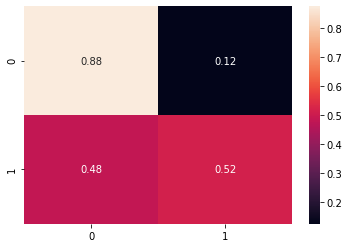

In [64]:
#Obtenemos el conjunto de caracteristicas (2)
Forest_SelectKBest2 = sklearn.feature_selection.SelectKBest(k=2).fit(S_Entrena, Entrena_class)
caract_Forest_KBest2 = Forest_SelectKBest2.get_support(indices=False) #<- Array que indica las caracteristicas consideradas
#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_Forest_KBest2 = []
for i in range(len(caract_Forest_KBest2)):
  if caract_Forest_KBest2[i] == True:
    select_carac_Forest_KBest2.append(nombres[i])
print('Las caracteristicas seleccionadas son: '+str(select_carac_Forest_KBest2))

#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu_Forest_KBest2 = Forest_SelectKBest2.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu_Forest_KBest2 = Forest_SelectKBest2.transform(S_Vali) #<----- Conjunto de validacion
Test_redu_Forest_KBest2 = Forest_SelectKBest2.transform(S_Test) #<----- Conjunto de prueba

#Reentrenamos con el conjunto reducido
Forest_KBest2 = sklearn.ensemble.RandomForestClassifier(max_depth=3)
grid_Forest_KBest2 = sklearn.model_selection.GridSearchCV(Forest_KBest2, param_grid={'n_estimators' : [50, 100, 150, 200, 250]}, cv=ps) 

time14 = time.time() #<------- Inicio del entrenamiento
grid_Forest_KBest2.fit(Entrena_Vali_redu_Forest_KBest2, Entrena_Vali_class)
time15 = time.time() #<-------- Final del entrenamiento

#Vemos los hiperparametros del grid
print('Los mejores hiperparametros son: '+str(grid_Forest_KBest2.best_params_))
#Vemos el score
print('El score es: '+str(grid_Forest_KBest2.best_score_))
#Vemos el tiempo de entrenamiento
tiempo7 = time15-time14
print('El tiempo de entrenamiento es de: '+str(tiempo7))

#Obtenemos el mejor estimador
estim_Forest_KBest2 = grid_Forest_KBest2.best_estimator_

#Obtenemos la prediccion del clasificador sobre el conjunto de validacion
predi_vali_Forest_KBest2 = estim_Forest_KBest2.predict(Vali_redu_Forest_KBest2)

#Obtenemos la matriz de confusión
Confu8 = sklearn.metrics.confusion_matrix(Vali_class, predi_vali_Forest_KBest2, normalize='true')

#Mostramos la matriz de confusion
matrix8 = sns.heatmap(Confu8, annot=True)

#Obtenemos el accuracy del SVM lineal
accuracy_Forest_KBest2 = sklearn.metrics.accuracy_score(Vali_class, predi_vali_Forest_KBest2)
                                              
print('El accuracy al usar un conjunto de caracteristicas reducidas (2 caracteristicas) es: '+str(accuracy_Forest_KBest2))



> Actividad O



In [65]:
#El estimador SVM lineal sin reducir caracteristicas es estim_lin
#El estimador del SVM lineal con caracteristicas reducidas al usar SelectFromModel es estim_lin2 
#El estimador del SVM lineal al seleccionar a las 4 mejores caracteristicas es estim_KBest4
#El estimador del SVM lineal al seleccionar a las 2 mejores caracteristicas es estim_KBest2
#El randomForest sin reducir caracteristicas es estim_Forest1
#El randomForest con caracteristicas reducidas al usar SelectFromModel es estim_Forest2
#El randomFores al seleccionar a las 4 mejores caracteristicas es estim_Forest_KBest4
#El randomForest al seleccionar a las 2 mejores caracteristicas es estim_Forest_KBest2

#Obtenemos las prediciones de los distintos clasificadores sobre el conjunto Test
predi_test_lin = estim_lin.predict(S_Test) #SVM lineal sin reducir caracteristicas
predi_test_lin2 = estim_lin2.predict(Test_redu) #SVM lineal con SelectFromModel
predi_test_KBest4 = estim_KBest4.predict(Test_redu_KBest4) #SVM lineal con las 4 mejores caracteristicas
predi_test_KBest2 = estim_KBest2.predict(Test_redu_KBest2) #SVM lineal con las 2 mejores caracteristicas
predi_test_Forest1 = estim_Forest1.predict(S_Test) #Random Forest sin reducir caracteristicas
predi_test_Forest2 = estim_Forest2.predict(Test_redu_Forest1) #Random Forest con SelectFromModel
predi_test_Forest_KBest4 = estim_Forest_KBest4.predict(Test_redu_Forest_KBest4) #Random Forest con las 4 mejores caracteristicas
predi_test_Forest_KBest2 = estim_Forest_KBest2.predict(Test_redu_Forest_KBest2) #Random Forest con las 2 mejores caracteristicas

#Obtenemos las matrices de confusion
Confu_lin = sklearn.metrics.confusion_matrix(Test_class, predi_test_lin, normalize='true')
Confu_lin2 = sklearn.metrics.confusion_matrix(Test_class, predi_test_lin2, normalize='true')
Confu_KBest4 = sklearn.metrics.confusion_matrix(Test_class, predi_test_KBest4, normalize='true')
Confu_KBest2 = sklearn.metrics.confusion_matrix(Test_class, predi_test_KBest2, normalize='true')
Confu_Forest1 = sklearn.metrics.confusion_matrix(Test_class, predi_test_Forest1, normalize='true')
Confu_Forest2 = sklearn.metrics.confusion_matrix(Test_class, predi_test_Forest2, normalize='true')
Confu_Forest_KBest4 = sklearn.metrics.confusion_matrix(Test_class, predi_test_Forest_KBest4, normalize='true')
Confu_Forest_KBest2 = sklearn.metrics.confusion_matrix(Test_class, predi_test_Forest_KBest2, normalize='true')

#Obtenemos los accuracys
accuracy_f_lin = sklearn.metrics.accuracy_score(Test_class, predi_test_lin)
accuracy_f_lin2 = sklearn.metrics.accuracy_score(Test_class, predi_test_lin2)
accuracy_f_KBest4 = sklearn.metrics.accuracy_score(Test_class, predi_test_KBest4)
accuracy_f_KBest2 = sklearn.metrics.accuracy_score(Test_class, predi_test_KBest2)
accuracy_f_Forest1 = sklearn.metrics.accuracy_score(Test_class, predi_test_Forest1)
accuracy_f_Forest2 = sklearn.metrics.accuracy_score(Test_class, predi_test_Forest2)
accuracy_f_Forest_KBest4 = sklearn.metrics.accuracy_score(Test_class, predi_test_Forest_KBest4)
accuracy_f_Forest_KBest2 = sklearn.metrics.accuracy_score(Test_class, predi_test_Forest_KBest2)

Para el caso del SVM lineal sin reducir caracteristicas se escoge
el mejor clasificador y se evalua el conjunto de Test obteniendo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7727272727272727
La matriz de confusión es: 


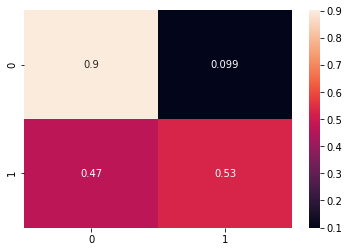

In [66]:
print('Para el caso del SVM lineal sin reducir caracteristicas se escoge')
print('el mejor clasificador y se evalua el conjunto de Test obteniendo lo siguiente:')
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_lin))
print('La matriz de confusión es: ')
sns.heatmap(Confu_lin, annot=True)

Para el caso del SVM lineal, al utilizar la funcion SelectFromModel, escoger
el mejor clasificador y evaluarlo sobre el conjunto de Test se obtuvo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7662337662337663
La matriz de confusión es: 


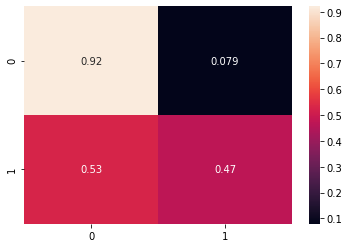

In [67]:
print('Para el caso del SVM lineal, al utilizar la funcion SelectFromModel, escoger')
print('el mejor clasificador y evaluarlo sobre el conjunto de Test se obtuvo lo siguiente:')
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_lin2))
print('La matriz de confusión es: ')
sns.heatmap(Confu_lin2, annot=True)

Para el caso del SVM lineal, usando un filtro para las caracteristicas escogiendo
las 4 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test
se obtuvo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7532467532467533
La matriz de confusión es: 


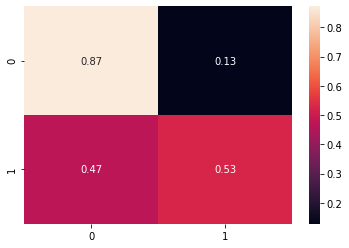

In [68]:
print('Para el caso del SVM lineal, usando un filtro para las caracteristicas escogiendo')
print('las 4 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test')
print('se obtuvo lo siguiente:') 
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_KBest4))
print('La matriz de confusión es: ')
sns.heatmap(Confu_KBest4, annot=True)

Para el caso del SVM lineal, usando un filtro para las caracteristicas escogiendo
las 2 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test
se obtuvo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7662337662337663
La matriz de confusión es: 


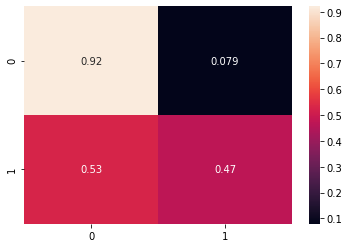

In [69]:
print('Para el caso del SVM lineal, usando un filtro para las caracteristicas escogiendo')
print('las 2 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test')
print('se obtuvo lo siguiente:') 
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_KBest2))
print('La matriz de confusión es: ')
sns.heatmap(Confu_KBest2, annot=True)

Para el caso del Random Forest sin reducir caracteristicas se escoge
el mejor clasificador y se evalua el conjunto de Test obteniendo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7532467532467533
La matriz de confusión es: 


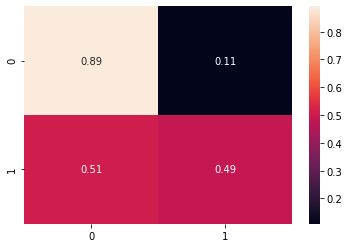

In [70]:
print('Para el caso del Random Forest sin reducir caracteristicas se escoge')
print('el mejor clasificador y se evalua el conjunto de Test obteniendo lo siguiente:')
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_Forest1))
print('La matriz de confusión es: ')
sns.heatmap(Confu_Forest1, annot=True)

Para el caso del Random Forest, al utilizar la funcion SelectFromModel, escoger
el mejor clasificador y evaluarlo sobre el conjunto de Test se obtuvo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7467532467532467
La matriz de confusión es: 


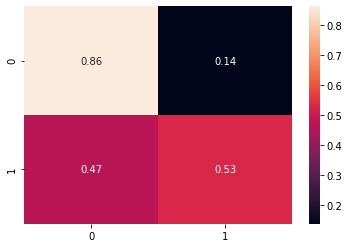

In [71]:
print('Para el caso del Random Forest, al utilizar la funcion SelectFromModel, escoger')
print('el mejor clasificador y evaluarlo sobre el conjunto de Test se obtuvo lo siguiente:')
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_Forest2))
print('La matriz de confusión es: ')
sns.heatmap(Confu_Forest2, annot=True)

Para el caso del Random Forest, usando un filtro para las caracteristicas escogiendo
las 4 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test
se obtuvo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7467532467532467
La matriz de confusión es: 


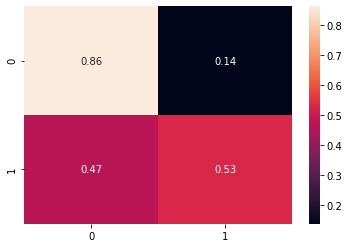

In [72]:
print('Para el caso del Random Forest, usando un filtro para las caracteristicas escogiendo')
print('las 4 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test')
print('se obtuvo lo siguiente:') 
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_Forest_KBest4))
print('La matriz de confusión es: ')
sns.heatmap(Confu_Forest_KBest4, annot=True)

Para el caso del Random Forest, usando un filtro para las caracteristicas escogiendo
las 2 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test
se obtuvo lo siguiente:

El accuracy sobre el conjunto de test es: 0.7727272727272727
La matriz de confusión es: 


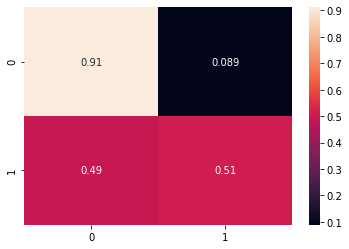

In [73]:
print('Para el caso del Random Forest, usando un filtro para las caracteristicas escogiendo')
print('las 2 mejores, tomando el mejor clasificador y evaluarlo sobre el conjunto de Test')
print('se obtuvo lo siguiente:') 
print('')

print('El accuracy sobre el conjunto de test es: '+str(accuracy_f_Forest_KBest2))
print('La matriz de confusión es: ')
sns.heatmap(Confu_Forest_KBest2, annot=True)

In [74]:
caracte_lin

array([False,  True, False, False, False,  True, False, False])